In [1]:
import pandas as pd
import numpy as np
import re
sdf = pd.read_csv("OpenKontiLUQS_SO2_2010-2019.csv", sep =  ";", skiprows = 2)
np.random.seed(0)



In [2]:
sdf

,Datum,Zeit,AABU SO2 1H Mittelwert [�g/m�],BIEL SO2 1H Mittelwert [�g/m�],BORG SO2 1H Mittelwert [�g/m�],BOTT SO2 1H Mittelwert [�g/m�],BUCH SO2 1H Mittelwert [�g/m�],DATT SO2 1H Mittelwert [�g/m�],DMD2 SO2 1H Mittelwert [�g/m�],DUBR SO2 1H Mittelwert [�g/m�],...,DWER SO2 1H Mittelwert [�g/m�],EVOG SO2 1H Mittelwert [�g/m�],LOER SO2 1H Mittelwert [�g/m�],MGRH SO2 1H Mittelwert [�g/m�],MSGE SO2 1H Mittelwert [�g/m�],NETT SO2 1H Mittelwert [�g/m�],RODE SO2 1H Mittelwert [�g/m�],SHW2 SO2 1H Mittelwert [�g/m�],WALS SO2 1H Mittelwert [�g/m�],WULA SO2 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,10.0,10.0,10.0,21.0,11.0,10.0,33.0,10.0,...,NaN,NaN,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0
1,01.01.2010,02:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,15.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,NaN
2,01.01.2010,03:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0
3,01.01.2010,04:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0
4,01.01.2010,05:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,NaN,NaN,NaN,10.0,10.0,10.0,NaN,NaN,...,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
87644,31.12.2019,21:00,NaN,NaN,NaN,10.0,10.0,10.0,NaN,NaN,...,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
87645,31.12.2019,22:00,NaN,NaN,NaN,10.0,10.0,10.0,NaN,NaN,...,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
87646,31.12.2019,23:00,NaN,NaN,NaN,10.0,10.0,10.0,NaN,NaN,...,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sdf.columns

Index(['Datum', 'Zeit', 'AABU SO2 1H Mittelwert [�g/m�]',
       'BIEL SO2 1H Mittelwert [�g/m�]', 'BORG SO2 1H Mittelwert [�g/m�]',
       'BOTT SO2 1H Mittelwert [�g/m�]', 'BUCH SO2 1H Mittelwert [�g/m�]',
       'DATT SO2 1H Mittelwert [�g/m�]', 'DMD2 SO2 1H Mittelwert [�g/m�]',
       'DUBR SO2 1H Mittelwert [�g/m�]', 'DUB2 SO2 1H Mittelwert [�g/m�]',
       'DWER SO2 1H Mittelwert [�g/m�]', 'EVOG SO2 1H Mittelwert [�g/m�]',
       'LOER SO2 1H Mittelwert [�g/m�]', 'MGRH SO2 1H Mittelwert [�g/m�]',
       'MSGE SO2 1H Mittelwert [�g/m�]', 'NETT SO2 1H Mittelwert [�g/m�]',
       'RODE SO2 1H Mittelwert [�g/m�]', 'SHW2 SO2 1H Mittelwert [�g/m�]',
       'WALS SO2 1H Mittelwert [�g/m�]', 'WULA SO2 1H Mittelwert [�g/m�]'],
      dtype='object')

In [4]:
sdf.fillna(0 , inplace = True)

In [5]:
sdf

,Datum,Zeit,AABU SO2 1H Mittelwert [�g/m�],BIEL SO2 1H Mittelwert [�g/m�],BORG SO2 1H Mittelwert [�g/m�],BOTT SO2 1H Mittelwert [�g/m�],BUCH SO2 1H Mittelwert [�g/m�],DATT SO2 1H Mittelwert [�g/m�],DMD2 SO2 1H Mittelwert [�g/m�],DUBR SO2 1H Mittelwert [�g/m�],...,DWER SO2 1H Mittelwert [�g/m�],EVOG SO2 1H Mittelwert [�g/m�],LOER SO2 1H Mittelwert [�g/m�],MGRH SO2 1H Mittelwert [�g/m�],MSGE SO2 1H Mittelwert [�g/m�],NETT SO2 1H Mittelwert [�g/m�],RODE SO2 1H Mittelwert [�g/m�],SHW2 SO2 1H Mittelwert [�g/m�],WALS SO2 1H Mittelwert [�g/m�],WULA SO2 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,10.0,10.0,10.0,21.0,11.0,10.0,33.0,10.0,...,0.0,0.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
1,01.01.2010,02:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,15.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,0.0
2,01.01.2010,03:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
3,01.01.2010,04:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
4,01.01.2010,05:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87644,31.12.2019,21:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87645,31.12.2019,22:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87646,31.12.2019,23:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sdf_col=['Datum',
'Zeit',
'Aachen',
'Bielefeld',
'Borken',
'Bottrop',
'Duisburg',
'Datteln',
'Dortmund',
'Duisburg1',
'Duisburg2',
'Duesseldorf1',
'Essen',
'Duesseldorf2',
'Moenchengladbach',
'Muenster',
'Nettetal',
'Cologne',
'Schwerte',
'Duisburg3',
'Wuppertal']

In [9]:

sdf_col

['Datum',
 'Zeit',
 'Aachen',
 'Bielefeld',
 'Borken',
 'Bottrop',
 'Duisburg',
 'Datteln',
 'Dortmund',
 'Duisburg1',
 'Duisburg2',
 'Duesseldorf1',
 'Essen',
 'Duesseldorf2',
 'Moenchengladbach',
 'Muenster',
 'Nettetal',
 'Cologne',
 'Schwerte',
 'Duisburg3',
 'Wuppertal']

In [10]:
sdf.columns = sdf_col

In [11]:
sdf

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Duisburg1,...,Duesseldorf1,Essen,Duesseldorf2,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Duisburg3,Wuppertal
0,01.01.2010,01:00,10.0,10.0,10.0,21.0,11.0,10.0,33.0,10.0,...,0.0,0.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
1,01.01.2010,02:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,15.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,0.0
2,01.01.2010,03:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
3,01.01.2010,04:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
4,01.01.2010,05:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87644,31.12.2019,21:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87645,31.12.2019,22:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
87646,31.12.2019,23:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
sdf_sorted_col=['Datum',
'Zeit',
'Aachen',
'Bielefeld',
'Borken',
'Bottrop',
'Duisburg',
'Datteln',
'Dortmund',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duesseldorf1',
'Duesseldorf2',
'Essen',
'Moenchengladbach',
'Muenster',
'Nettetal',
'Cologne',
'Schwerte',
'Wuppertal']

In [13]:
sdf = sdf[sdf_sorted_col]

In [14]:
sdf

,Datum,Zeit,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Duisburg1,...,Duisburg3,Duesseldorf1,Duesseldorf2,Essen,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Wuppertal
0,01.01.2010,01:00,10.0,10.0,10.0,21.0,11.0,10.0,33.0,10.0,...,10.0,0.0,10.0,0.0,10.0,10.0,0.0,10.0,10.0,10.0
1,01.01.2010,02:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,0.0,10.0,15.0,10.0,10.0,0.0,10.0,10.0,0.0
2,01.01.2010,03:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0
3,01.01.2010,04:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0
4,01.01.2010,05:00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,0.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
87644,31.12.2019,21:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
87645,31.12.2019,22:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
87646,31.12.2019,23:00,0.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sdf['Duisburg'] = sdf.loc[: , "Duisburg1":"Duisburg3"].mean(axis = 1)
sdf['Duesseldorf'] = sdf.loc[: , "Duesseldorf1":"Duesseldorf2"].mean(axis = 1)

In [16]:
sdf.columns

Index(['Datum', 'Zeit', 'Aachen', 'Bielefeld', 'Borken', 'Bottrop', 'Duisburg',
       'Datteln', 'Dortmund', 'Duisburg1', 'Duisburg2', 'Duisburg3',
       'Duesseldorf1', 'Duesseldorf2', 'Essen', 'Moenchengladbach', 'Muenster',
       'Nettetal', 'Cologne', 'Schwerte', 'Wuppertal', 'Duesseldorf'],
      dtype='object')

In [17]:
sdf.drop(['Zeit','Duisburg1', 'Duisburg2', 'Duisburg3','Duesseldorf1', 'Duesseldorf2'], axis = 1, inplace = True) 

In [18]:
sdf

,Datum,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Essen,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Wuppertal,Duesseldorf
0,01.01.2010,10.0,10.0,10.0,21.0,6.666667,10.0,33.0,0.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0
1,01.01.2010,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,15.0,10.0,10.0,0.0,10.0,10.0,0.0,5.0
2,01.01.2010,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0
3,01.01.2010,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0
4,01.01.2010,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
87644,31.12.2019,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
87645,31.12.2019,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
87646,31.12.2019,0.0,0.0,0.0,10.0,3.333333,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [19]:
sdf['Datum'] = pd.to_datetime(sdf.Datum)

In [20]:
sdf.dtypes

Datum               datetime64[ns]
Aachen                     float64
Bielefeld                  float64
Borken                     float64
Bottrop                    float64
Duisburg                   float64
Datteln                    float64
Dortmund                   float64
Essen                      float64
Moenchengladbach           float64
Muenster                   float64
Nettetal                   float64
Cologne                    float64
Schwerte                   float64
Wuppertal                  float64
Duesseldorf                float64
dtype: object

In [21]:
sdf['Year'] = sdf.Datum.dt.year

In [22]:
sdf

,Datum,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Essen,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Wuppertal,Duesseldorf,Year
0,2010-01-01,10.0,10.0,10.0,21.0,6.666667,10.0,33.0,0.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
1,2010-01-01,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,15.0,10.0,10.0,0.0,10.0,10.0,0.0,5.0,2010
2,2010-01-01,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
3,2010-01-01,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
4,2010-01-01,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87644,2019-12-31,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87645,2019-12-31,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87646,2019-12-31,0.0,0.0,0.0,10.0,3.333333,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019


In [23]:
sdf.drop(['Datum'],axis = 1, inplace = True)

In [24]:
sdf

,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Essen,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Wuppertal,Duesseldorf,Year
0,10.0,10.0,10.0,21.0,6.666667,10.0,33.0,0.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
1,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,15.0,10.0,10.0,0.0,10.0,10.0,0.0,5.0,2010
2,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
3,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
4,10.0,10.0,10.0,10.0,6.666667,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,5.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87644,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87645,0.0,0.0,0.0,10.0,6.666667,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019
87646,0.0,0.0,0.0,10.0,3.333333,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019


<AxesSubplot:>

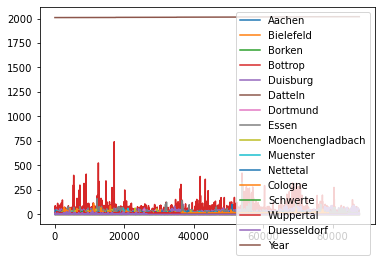

In [25]:
sdf.plot()

In [26]:
sdf[sdf.Year == 2010 ].mean()

Aachen                 9.446575
Bielefeld              9.499315
Borken                 9.681849
Bottrop               14.217123
Duisburg               8.906583
Datteln                9.823402
Dortmund               9.657991
Essen                 10.285388
Moenchengladbach      10.047831
Muenster               9.541096
Nettetal               9.138584
Cologne                9.540297
Schwerte               9.069406
Wuppertal              9.603425
Duesseldorf            4.933676
Year                2010.000000
dtype: float64

In [37]:
sdf.to_csv('SO2_beta.csv')

In [27]:
sdf2 = sdf.groupby("Year").mean()

In [28]:
sdf2

,Aachen,Bielefeld,Borken,Bottrop,Duisburg,Datteln,Dortmund,Essen,Moenchengladbach,Muenster,Nettetal,Cologne,Schwerte,Wuppertal,Duesseldorf
Year,,,,,,,,,,,,,,,
2010,9.446575,9.499315,9.681849,14.217123,8.906583,9.823402,9.657991,10.285388,10.047831,9.541096,9.138584,9.540297,9.069406,9.603425,4.933676
2011,9.404566,9.649087,9.565411,15.540411,8.112557,9.656507,9.538813,10.202854,9.848973,9.601712,9.063470,9.577854,0.275114,9.560046,4.896404
2012,0.610770,9.568648,9.684654,13.964822,8.026829,9.704690,9.497609,10.081284,9.704577,9.571835,9.580943,9.665984,0.000000,9.496699,4.868454
2013,0.000000,1.466210,9.664498,13.332420,8.805213,9.676370,4.532763,9.500000,9.680137,9.434475,9.696233,9.280936,0.000000,9.714612,0.087329
2014,0.000000,0.000000,9.782877,14.305023,9.204224,9.716553,0.000000,10.043493,9.145662,9.681393,9.688470,9.686301,0.000000,1.135616,0.000000
2015,0.000000,0.000000,9.691096,14.455708,8.566514,9.587900,0.000000,9.825685,0.000000,5.771005,9.733904,9.732306,0.000000,0.000000,0.000000
2016,0.000000,0.000000,9.728484,14.208789,8.079918,9.755237,0.000000,10.150046,0.000000,0.000000,9.666439,9.621015,0.000000,0.000000,0.000000
2017,0.000000,0.000000,9.704795,14.997831,8.706773,9.633790,0.000000,9.817808,0.000000,0.000000,9.672831,9.599543,0.000000,0.000000,0.000000
2018,0.000000,0.000000,9.704338,13.058790,8.584703,9.582877,0.000000,9.815068,0.000000,0.000000,9.628881,9.675228,0.000000,0.000000,0.000000


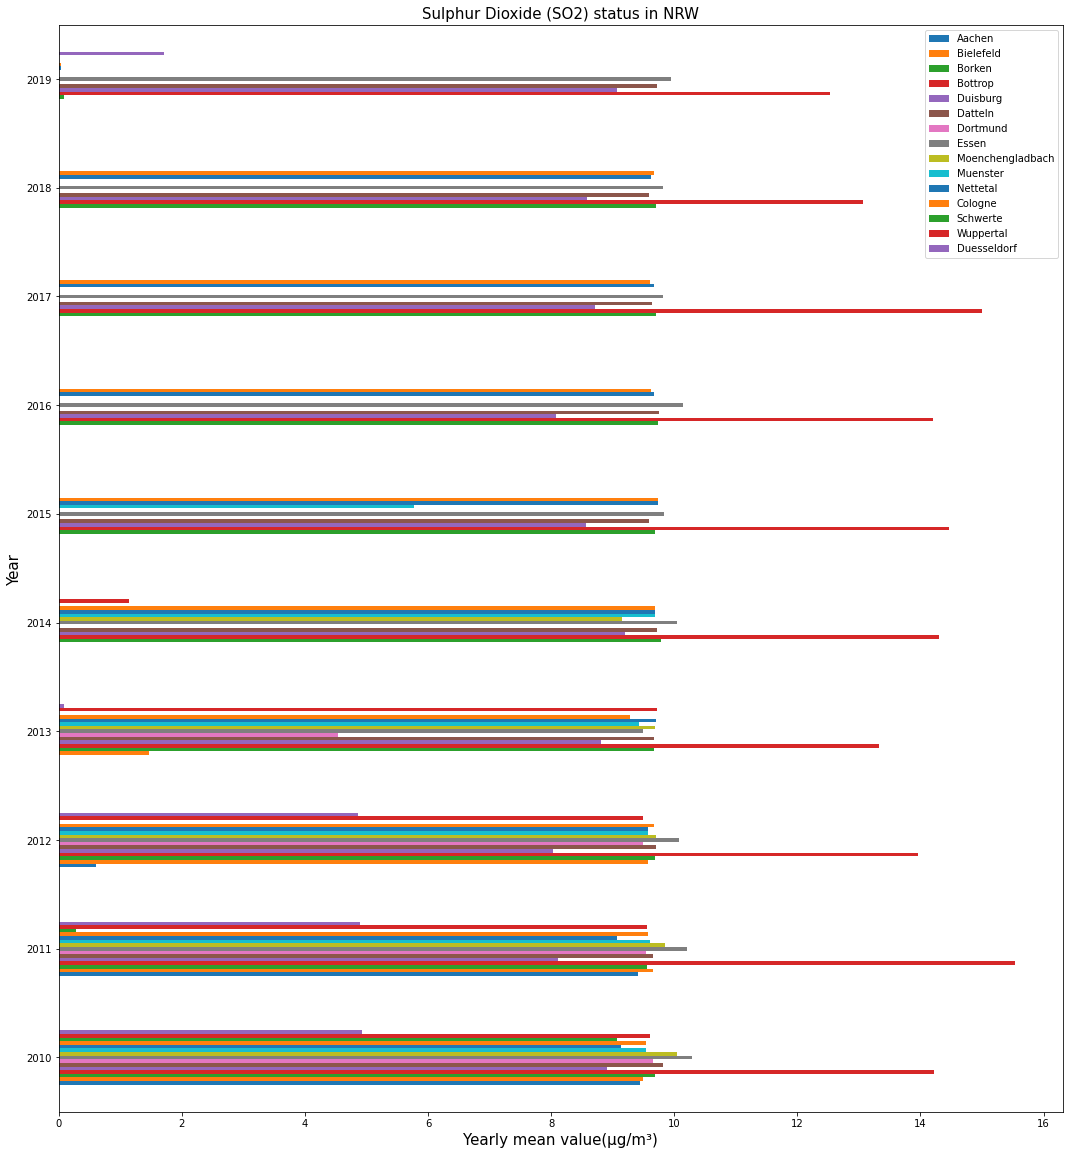

In [29]:
ax = sdf2.plot(kind = "barh",figsize=(18,20), fontsize=10)
ax.set_xlabel("Yearly mean value(µg/m³)",fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_title("Sulphur Dioxide (SO2) status in NRW",fontsize=15)
fig = ax.get_figure()   
fig.savefig('SO2.png')